![formula](equation_a.png)
### Nomenclature
<pre>
A = surface area (m2)
η = efficiency of the solar oven
S = entropy (J/K)
Tamb = ambient temperature (K)
T = temperature at which heat transfer occurs (K)
I = irradiance (W/m²)
H = enthalpy (J)
Cp = specific heat capacity (kJ/kg·K)
m = mass (kg)
h = convective heat transfer coefficient (W/m²·K)
ho = hour angle (15∘ per hour from solar noon)
θ​ = solar zenith angle
ϕ = latitude
δ = solar declination angle, varying with season
ny = day of the year (1–365)
G = Gibbs energy (J)
Ex = Exergy (J)
H = Enthalpy (J)
</pre>
### Constants
<pre>
k = absorption coefficient for water vapor (varies with wavelength; typically 0.1−0.2 m2/kg)
I0 = solar constant (≈1361 W/m² on a horizontal surface) 
L = latent heat of vaporization (2260kJ/kg).
n = exponent, typically around 0.8 for turbulent flow
Iz0 =1000W/m2 clear-sky global horizontal irradiance (GHI) at sea level
ηsecond-law = second law, typically in the 0.6–0.8 range.
</pre>

In [ ]:
K= 0.2
I= 1361.0
A= 1.5
T_amb= 295.15
C= 0.0
d= 1.0
A_cond= 1.0
η= 1.0
ϵ= 1.0
σ= 1.0
h= 1.0

def T(t: float)-> float:
    return T_amb + (η*I*A*(1.0-C))/((ϵ*σ*A*(t**4 - T_amb**4)) + (K*A*A_cond*((t-T_amb)/d)) + (h*A*(t-T_amb)))

![graph reference](graph_reference.png)

1. Ascending
2. Sinusoidal behavior (around 121°)
3. Falling

tick= 5 seconds

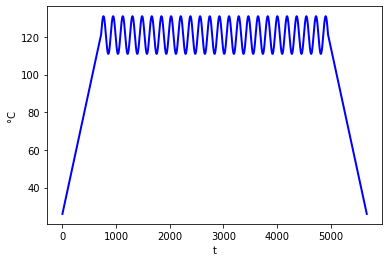

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

stagnation_temperature= 121
time_to_stagnation= 720 
time_sinusoid= 4230

def stage1(t0: float= 26.0, time: float= 720, stagn: float= 121.0):
    x= np.array([x for x in range(0, time + 1, 1)])
    y= np.linspace(t0, stagn, time + 1)
    return x, y

def stage2(stagn:float= 121.0, amp: float= 10.0, time: tuple= (time_to_stagnation, time_to_stagnation+time_sinusoid), period: float= 180):
    x= np.array([x for x in range(time[0] + 1, time[1] + 1, 1)])
    y= amp * np.sin((2 * np.pi / period) * x) + stagn
    return x, y

def stage3(t0: float= 26.0, stagn:float= 121, time: tuple= (time_to_stagnation, time_to_stagnation+time_sinusoid)):
    x= np.array([x + time[1] + 1 for x in range(0, time[0] + 1, 1)])
    y= np.linspace(stagn, t0, time[0] + 1)
    return x, y

x = np.concatenate((stage1()[0], stage2()[0], stage3()[0]))
y = np.concatenate((stage1()[1], stage2()[1], stage3()[1]))
plt.plot(x, y, color="blue", linestyle="-", linewidth=2)
plt.xlabel("t")
plt.ylabel("°C")
plt.show()